In [1]:
import os
import pandas as pd
import numpy as np


In [2]:
import sys

sys.path.append("..")
from mc_lib.utils import size_and_ratio
sys.path.remove("..")
print(sys.path)

['/Users/mckim/anaconda3/envs/py36/lib/python36.zip', '/Users/mckim/anaconda3/envs/py36/lib/python3.6', '/Users/mckim/anaconda3/envs/py36/lib/python3.6/lib-dynload', '', '/Users/mckim/anaconda3/envs/py36/lib/python3.6/site-packages', '/Users/mckim/anaconda3/envs/py36/lib/python3.6/site-packages/IPython/extensions', '/Users/mckim/.ipython']


In [20]:
filepath = "../v2/data/md_data__with_baby_having_dx.csv"

In [5]:
df_with_diagnosis = pd.read_csv(filepath, dtype=str)

In [6]:
df_with_diagnosis.shape

(23410751, 25)

In [7]:
df_with_diagnosis['data_1'].unique()

array(['38.0', '13_0_11_5_2_0_0_1_2', '38.5', ..., '2021-05-31 17:59:17',
       '2021-05-31 17:11:03', '2021-05-31 21:00:01'], dtype=object)

In [8]:
df_nonull = df_with_diagnosis[df_with_diagnosis['data_1'].notnull()]
df_nonull.shape

(23410172, 25)

In [9]:
df_single_digit = df_nonull[df_nonull['data_1'].str.len() == 1]
df_single_digit['data_1'].nunique()

9

In [10]:
df_single_digit['data_1'].unique()

array(['0', '1', '3', '5', '2', '4', '8', '7', '6'], dtype=object)

In [11]:
df_null = df_with_diagnosis[df_with_diagnosis['type'].isnull()]
df_null.shape

(0, 25)

In [12]:
cols_to_int = ['type', 'gender', 'convulsion']

for col in cols_to_int:
    print(df_with_diagnosis[df_with_diagnosis[col].isnull()].shape)
    df_with_diagnosis[col] = df_with_diagnosis[col].apply(lambda x : str(int(float(x))) if pd.notnull(x) else None)
    display(df_with_diagnosis[col].describe())

(0, 25)


count     23410751
unique           7
top              1
freq      13508461
Name: type, dtype: object

(0, 25)


count     23410751
unique           3
top              1
freq      11775474
Name: gender, dtype: object

(0, 25)


count     23410751
unique           2
top              0
freq      18501430
Name: convulsion, dtype: object

In [14]:
df_with_diagnosis = df_with_diagnosis.sort_values('baby_id')
df_with_diagnosis.head()

,_id,baby_id,date,type,data_1,data_2,data_3,data_4,data_5,data_6,...,weight,gender,birthday,convulsion,Unnamed: 0,app_code,group_id,lat,lng,last_update_de
23379918,85503079,1000023,2021-05-08 12:59:00,2,0,0.022,2,1,세토펜(정) 325 mg,NaN,...,22.0,1,2013-06-18,1,NaN,100,NaN,37.64491,127.1179,2021-05-08 13:09:38
23379947,85709154,1000023,2021-05-12 00:04:56,1,37.7,C,NaN,0,NaN,NaN,...,22.0,1,2013-06-18,1,NaN,100,20210512000503,37.64503,127.1177,2021-05-12 00:05:03
23379948,85712400,1000023,2021-05-12 01:36:56,1,38,C,NaN,0,NaN,NaN,...,22.0,1,2013-06-18,1,NaN,100,20210512013706,37.64493,127.1179,2021-05-12 01:37:06
23379949,85712922,1000023,2021-05-12 01:54:12,1,38.1,C,NaN,0,NaN,NaN,...,22.0,1,2013-06-18,1,NaN,100,20210512015419,37.64492,127.1179,2021-05-12 01:54:20
23379950,85712930,1000023,2021-05-12 01:54:26,2,0,8,1,2,부루펜,NaN,...,22.0,1,2013-06-18,1,NaN,100,NaN,37.64504,127.1176,2021-05-12 01:54:40


In [15]:
cols_to_int = ['type', 'gender', 'convulsion']

for col in cols_to_int:
    print(df_with_diagnosis[df_with_diagnosis[col].isnull()].shape)

(0, 25)
(0, 25)
(0, 25)


In [16]:
df_with_diagnosis['gender'].describe()

count     23410751
unique           3
top              1
freq      11775474
Name: gender, dtype: object

In [28]:
new_filepath = "../v2/data/md_data__with_baby_having_dx_sorted.csv"

In [29]:
df_with_diagnosis.to_csv(new_filepath, index=False)

In [27]:
df_new_dx = pd.read_csv(filepath, dtype=str)
df_new_dx.head()

,_id,baby_id,date,type,data_1,data_2,data_3,data_4,data_5,data_6,...,weight,gender,birthday,convulsion,Unnamed: 0,app_code,group_id,lat,lng,last_update_de
0,85503079,1000023,2021-05-08 12:59:00,2,0,0.022,2,1,세토펜(정) 325 mg,NaN,...,22.0,1,2013-06-18,1,NaN,100,NaN,37.64491,127.1179,2021-05-08 13:09:38
1,85709154,1000023,2021-05-12 00:04:56,1,37.7,C,NaN,0,NaN,NaN,...,22.0,1,2013-06-18,1,NaN,100,20210512000503,37.64503,127.1177,2021-05-12 00:05:03
2,85712400,1000023,2021-05-12 01:36:56,1,38,C,NaN,0,NaN,NaN,...,22.0,1,2013-06-18,1,NaN,100,20210512013706,37.64493,127.1179,2021-05-12 01:37:06
3,85712922,1000023,2021-05-12 01:54:12,1,38.1,C,NaN,0,NaN,NaN,...,22.0,1,2013-06-18,1,NaN,100,20210512015419,37.64492,127.1179,2021-05-12 01:54:20
4,85712930,1000023,2021-05-12 01:54:26,2,0,8,1,2,부루펜,NaN,...,22.0,1,2013-06-18,1,NaN,100,NaN,37.64504,127.1176,2021-05-12 01:54:40


In [30]:
df_null_gender = df_with_diagnosis[df_with_diagnosis['gender'].isnull()]



In [31]:
pd.to_datetime(df_null_gender['date']).describe()

count       0
unique      0
top       NaN
freq      NaN
Name: date, dtype: object

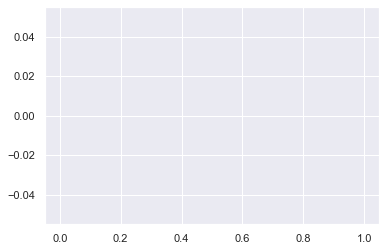

In [32]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

plt.hist(pd.to_datetime(df_null_gender['date']), bins=50)
plt.show()

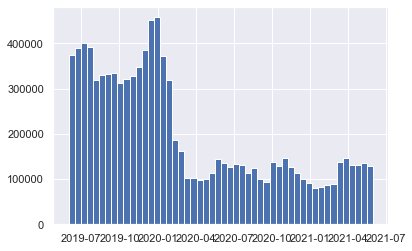

In [32]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

plt.hist(pd.to_datetime(df_null_gender['date']), bins=50)
plt.show()

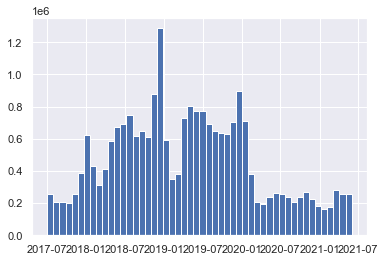

In [33]:

plt.hist(pd.to_datetime(df_with_diagnosis['date']), bins=50)
plt.show()